In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Cargar el conjunto de datos
data_path = '/content/drive/MyDrive/Inteligecia Artificial l/Laboratorio 1/sandy_ck_homebush_joined.csv'
df = pd.read_csv(data_path, parse_dates=['Timestamp'])

In [35]:
# Imputar valores faltantes en las variables independientes
imputer_X = SimpleImputer(strategy='mean')
df[['Conductivity', 'Q', 'Temp', 'Turbidity', 'Dayofweek', 'Month']] = imputer_X.fit_transform(df[['Conductivity', 'Q', 'Temp', 'Turbidity', 'Dayofweek', 'Month']])


In [36]:
# Imputar valores faltantes en la variable dependiente
imputer_y = SimpleImputer(strategy='mean')
df['Level'] = imputer_y.fit_transform(df[['Level']])

In [37]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['Conductivity', 'Q', 'Temp', 'Turbidity', 'Dayofweek', 'Month']]
y = df['Level']

In [38]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal multivariable
model = make_pipeline(StandardScaler(), LinearRegression())

In [39]:
# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [40]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [41]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.29203126382035777


In [42]:
# Obtener los coeficientes y la intercepción del modelo
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

In [43]:
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-0.07020571  0.31143985 -0.04919625  0.24210893 -0.00558358 -0.08089465]
Intercept: 0.730490149085808


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Crear un DataFrame con las predicciones y los valores reales
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

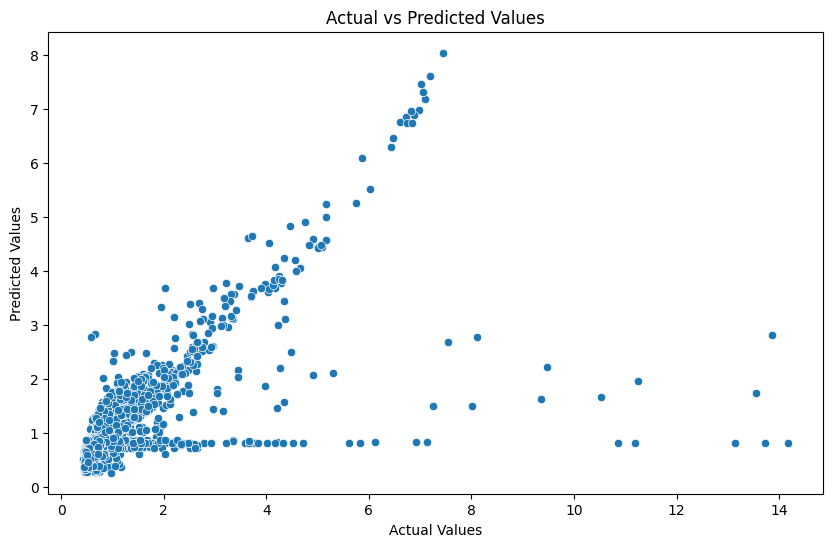

In [47]:
# Graficar la relación entre los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()